In [36]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from pathlib import Path
import os

from pathlib import Path
from sklearn.cross_validation import cross_val_score
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

path = str(Path().resolve())+'\Data'
activityList = ['Wipers','Number7','Chicken', 'SideStep', 'Turnclap']
activityList_lower = [activity.lower() for activity in activityList]

print(activityList_lower)
print(path)

['wipers', 'number7', 'chicken', 'sidestep', 'turnclap']
C:\Users\Administrator\CG3002\Software\Data


In [37]:
def normalize_val(num, min_value, max_value):
    if min_value < max_value:
        return (num - min_value) / (max_value - min_value)
    if min_value > 0:
        return min_value / (min_value + 1)
    return min_value / (min_value - 1)

In [38]:
np.random.seed(5)
start = time.clock()
path = path + '\\' + 'combinedFeatureDataCSV_Arduino.csv'
f = open(path)
df = pd.read_csv(f)
df.dropna(how = 'any',inplace=True)

features_name = df.columns[1:len(df)]
print('Number of features:',len(features_name))
d = np.random.uniform(0, 1, len(df))
p = np.percentile(d, 75)
df['is_train'] = d <= p
train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

train_label = pd.factorize(train['Activity'],sort=True)[0]
test_label,test_uni = pd.factorize(test['Activity'],sort=True)

clf = RandomForestClassifier(n_estimators =50, max_features = 'sqrt', n_jobs=2, min_samples_leaf = 1,criterion = 'entropy')
averageScore = np.mean(cross_val_score(clf, train[features_name], train_label, cv=10))
if (averageScore>0.95):
    print ("The classifier is good and average score for training is %s . " % averageScore)
else:
    if (averageScore<0.9):
        print ("The classifier is not bad and average score for training is %s . " % averageScore)
    else:
        print ("The classifier needs to be improved  and average score for training is %s . " % averageScore)
model = clf.fit(train[features_name],train_label)
test_predict = clf.predict(test[features_name])

# 10-Fold Cross validation

print ("-------------------")
print("Accuracy for RandomForest:", (accuracy_score(test_predict, test_label))*100)
accuracy = accuracy_score(test_predict, test_label)

print(classification_report(test_predict, test_label, target_names=test_uni))
print (confusion_matrix(test_label, test_predict,labels = [0,1,2]))
# joblib.dump(clf, 'RandomForest_Arduino.pkl')ni
joblib.dump(clf, 'RandomForest_Arduino.pkl')
end = time.clock()
print ("processing time of the model is: ",end - start)

Number of features: 72
Number of observations in the training data: 1016
Number of observations in the test data: 339
The classifier is good and average score for training is 0.987017825311943 . 
-------------------
Accuracy for RandomForest: 100.0
             precision    recall  f1-score   support

    chicken       1.00      1.00      1.00       100
    number7       1.00      1.00      1.00        47
   sidestep       1.00      1.00      1.00        80
   turnclap       1.00      1.00      1.00        57
     wipers       1.00      1.00      1.00        55

avg / total       1.00      1.00      1.00       339

[[100   0   0]
 [  0  47   0]
 [  0   0  80]]
processing time of the model is:  3.9271103684768605


In [39]:
from tabulate import tabulate

headers = ["name", "score"]
values = sorted(zip(train[features_name].columns, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                     score
gyro_leg_x_std     0.0741922
gyro_rh_z_iqr      0.0703703
gyro_lh_x_std      0.0527983
gyro_lh_y_mean     0.0526272
gyro_rh_x_std      0.0476495
gryo_leg_z_std     0.0468052
gyro_lh_z_std      0.0450084
gyro_rh_z_std      0.0447891
gryo_leg_y_std     0.0416785
gyro_lh_y_median   0.0405052
gryo_leg_y_iqr     0.0400808
gyro_lh_x_iqr      0.0369241
gyro_rh_z_median   0.0321293
gyro_lh_y_std      0.0309595
gyro_rh_y_iqr      0.0298038
gyro_leg_x_iqr     0.025386
gyro_lh_y_iqr      0.0249019
gyro_lh_z_iqr      0.0213912
acc_lh_x_median    0.0198071
gryo_leg_y_median  0.0156176
gryo_leg_z_iqr     0.0150929
gyro_rh_y_std      0.0101394
acc_rh_x_median    0.0094088
gryo_leg_y_mean    0.00918386
gyro_rh_x_iqr      0.00828486
acc_rh_y_mean      0.00781857
gyro_lh_x_mean     0.00695236
acc_leg_y_mean     0.00655641
gyro_rh_y_mean     0.00640032
gyro_leg_x_mean    0.006008
acc_lh_z_median    0.00587
acc_leg_x_median   0.00537755
gyro_lh_z_median   0.00521665
gyro_rh_

In [44]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit_transform(train[features_name])

array([[0.11564, 0.11529, 0.11583, ..., 0.1477 , 0.30568, 0.39127],
       [0.21709, 0.21652, 0.21659, ..., 0.19935, 0.47837, 0.6417 ],
       [0.07783, 0.07695, 0.07739, ..., 0.05419, 0.28555, 0.4633 ],
       ...,
       [0.09475, 0.09538, 0.09588, ..., 0.16796, 0.38523, 0.62628],
       [0.03771, 0.0384 , 0.03903, ..., 0.06307, 0.36586, 0.65889],
       [0.0504 , 0.05097, 0.05158, ..., 0.05898, 0.38728, 0.69876]])

In [43]:
from sklearn.feature_selection import mutual_info_classif

feature_scores = mutual_info_classif(train[features_name], train_label)
Mean_score = 0
Std_score = 0
Median_score = 0
Iqr_score = 0
for score, fname in sorted(zip(feature_scores, features_name), reverse=True)[:]:
    if (fname.find("iqr")!= -1):
        Iqr_score = Iqr_score + score
    if (fname.find("mean")!= -1):
        Mean_score = Mean_score + score
    if (fname.find("median")!= -1):
        Median_score = Median_score + score
    if (fname.find("std")!= -1):
        Std_score = Std_score + score
print ("Mean score is "+ str(Mean_score))
print ("Std score is "+ str(Std_score))
print ("Median score is "+ str(Median_score))
print ("Iqr score is "+ str(Iqr_score))

Mean score is 5.413159924444707
Std score is 7.256040725090024
Median score is 5.28334216270967
Iqr score is 6.540685798603574


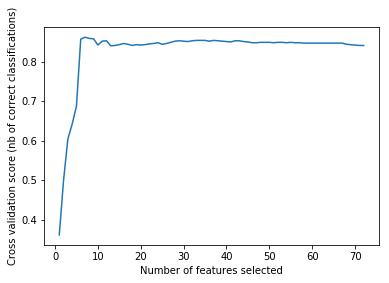

In [66]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = train[features_name]
y =train_label

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()